In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import datetime
from iautils import cascade

from datetime import datetime
from astropy.coordinates import SkyCoord

/opt/pysetup/.venv/lib/python3.11/site-packages/chime_frb_api/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution as _get_distribution


In [2]:
sys.path.append("/arc/home/mseth/.local/lib/python3.11/site-packages")
import memory_profiler



%load_ext memory_profiler

In [3]:
%matplotlib inline

In [4]:
sys.path.insert(0, os.path.abspath('beam-model'))
from beam_model import utils, formed

Stuff we define beforehand

In [5]:
freqs = np.linspace(400.390625, 800, 16384)          # The data has 16384 frequency channels
freqs_2 = np.linspace(400.390625, 800, 1024)         # The holography data has 1024 frequency channels
has = np.array(np.linspace(-105, 104.90278, 2160))   # 2160 HAs

source_name = "TAU_A"
coords = SkyCoord.from_name(source_name)
source_ra = coords.ra.deg
source_dec = coords.dec.deg


# BF to JY conversion equation
def bf_to_jy(bf_spectrum, f_good):
    factor = (np.square(1024) * 128) / (np.square(4) * 0.806745 * 400)
    result = bf_spectrum / ( factor * np.square(f_good) ) 
    return result

Data

In [6]:
data = np.load("/arc/projects/chime_frb/mseth/Crab_data_56_a.npz", allow_pickle=True)

dms = data['DM']
max_tidxs = data['MAX_TIDX']
max_timestamps = data['MAX_TIMESTAMP']
has_at_peak = data['HA']
y_at_peak = data['Y']
beam_ids_string = data['BEAM_ID']

beam_ids = []
for beam_id in beam_ids_string:
    beam_id_int = int(beam_id)
    beam_ids.append(beam_id_int)

spectra = np.load("/arc/projects/chime_frb/mseth/Crab_spectra_56_a.npz")

spectra_at_peak = spectra['SPECTRUM']

In [7]:
cascade_obj = cascade.load_cascade_from_file('/arc/projects/chime_frb/adamdong/for_meena/cascade_378100096_norescale.npz',)
cascade_obj.dm = 56.7

Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..



/opt/pysetup/.venv/lib/python3.11/site-packages/iautils/spectra.py:435: RuntimeWarning: All-NaN slice encountered
  pad = np.nanmedian(self.intensity, axis=1)


De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Pad

0


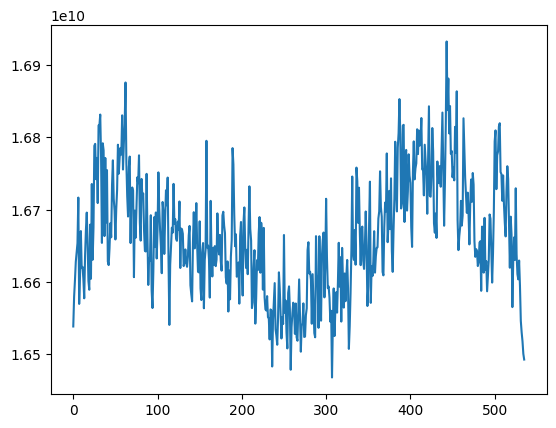

In [8]:
ts = np.nansum(cascade_obj.beams[cascade_obj._max_beam_idx].intensity, axis=0)
print(cascade_obj._max_beam_idx)
plt.plot(ts)
plt.show()

In [9]:
cascade_obj.beams
for beam in cascade_obj.beams:
    beam.subband(1024,56.7,apply_weights=False)
    print(beam.intensity.shape)
             

Subbanding to 1024 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shifted channels using 0 value..



/opt/pysetup/.venv/lib/python3.11/site-packages/iautils/spectra.py:579: RuntimeWarning: Mean of empty slice
  sub_nan = np.nanmean(


updating frequency channel information for beam after subbanding...
(1024, 536)
Subbanding to 1024 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shifted channels using 0 value..

updating frequency channel information for beam after subbanding...
(1024, 536)
Subbanding to 1024 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shifted channels using 0 value..

updating frequency channel information for beam after subbanding...
(1024, 536)
Subbanding to 1024 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shifted channels using 0 value..

updating frequency channel information for beam after subbanding...
(1024, 536)
Subbanding to 1024 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shifted channels using 0 value..

updating frequency channel information for beam after subbanding...
(1024, 536)
Subbanding to 1024 subbands (in frequency)..

In [ ]:
cascade_obj.beams
for beam in cascade_obj.beams:
    plt.figure()
    plt.plot(np.nanmean(beam.intensity,axis=0)))
             

In [ ]:
plt.figure()
plt.plot(freqs, spectra_at_peak[0])
plt.yscale('log')
plt.title("Example of uncorrected spectrum")
plt.show()

In [ ]:
plt.figure()
plt.plot(freqs, spectra_at_peak[0])
plt.yscale('log')
plt.title("Example of uncorrected spectrum")
plt.show()

Beams & Correcting

In [ ]:
## PRIMARY BEAM RESPONSE ##

# Load in holography data 
path = "/arc/projects/chime_frb/mseth/holography_data"

npz_files = []
for (root, dirs, file) in os.walk(path):
    for f in file: 
        npz_files.append(os.path.join(root, f))
        
xx_list = []
yy_list = []
for file in npz_files:
    data = np.load(file)
    xx = data['XX']
    yy = data['YY']
    xx_list.append(xx)
    yy_list.append(yy)

xx = np.vstack(xx_list)
yy = np.vstack(yy_list)

intensity = xx + yy / 2
intensity_masked = intensity[:,1760:1840]
intensity_max = np.max(intensity_masked)
intensity_norm = intensity / intensity_max

In [ ]:
plt.figure()
fig, ax = plt.subplot_mosaic(
    '''
    AA
    ''',
    figsize = (6,6),
    layout = 'constrained')

pcm = ax['A'].pcolormesh(has, freqs_2, np.log10(intensity_norm))
ax['A'].set_ylabel('Frequencies (MHz)')
ax['A'].set_xlabel('HA')
ax['A'].set_title('Intensity')

fig.colorbar(pcm, ax=ax['A'])

plt.show()

In [ ]:
xx.shape

In [ ]:
intensity_norm.shape

In [ ]:
# Get spectra at every peak HA 
presponse_norm = []

for ha in has_at_peak:
    idx = (np.abs(has - ha)).argmin()              # Find index of closest HA to HA at peak
    xx_response = xx[:,idx]
    yy_response = yy[:, idx]
    
    int_response = intensity_norm[:,idx]           # Get intensity spectrum at that HA 
    int_response[int_response==0] = np.nan
    presponse_norm.append(int_response)

In [ ]:
## CORRECTING FOR PRIMARY BEAM RESPONSE ##

p_corrected_sp = []

for i, (spectra, presponse) in enumerate(zip(spectra_at_peak, presponse_norm)):
    downsampled_spectra = spectra[::16]                           # Downsample data from 16384 freq channels to 1024 (to match holography
    spectra_at_peak_corrected = downsampled_spectra / presponse   # Correction
    p_corrected_sp.append(spectra_at_peak_corrected)

In [ ]:
## SYNTHESIZED BEAM RESPONSE + CORRECTING

sbm = formed.FFTFormedSincBeamModel()

calibrated_spectra = []

for i, (beam_id, ha, y, spectrum) in enumerate(zip(beam_ids, has_at_peak, y_at_peak, p_corrected_sp)):
    sensitivity = sbm.get_sensitivity(beam_id, np.array([ha, y]).T, freqs_2).squeeze()
    
    mean_sensitivity = np.nanmean(sensitivity)            # Average sensitivity across frequencies
    peak_sensitivity_ind = np.argmax(mean_sensitivity)            
    sensitivity_at_peak = sensitivity[peak_sensitivity_ind]    # Spectrum of synthesized response at its peak

    spectra_corrected = spectrum / sensitivity_at_peak            # Correction
    spectra_jy = bf_to_jy(spectra_corrected, 1)                   # Conversion
    calibrated_spectra.append(spectra_jy)

In [ ]:
mean_fluxes = []

for calibrated_spectrum in calibrated_spectra:
    mean = np.nanmean(calibrated_spectrum)
    mean_fluxes.append(mean)

In [ ]:
mean_fluxes

In [ ]:
plt.figure()
plt.plot(freqs_2/1000, calibrated_spectra[15])
plt.yscale('log')
plt.xscale('log')
plt.show()